## Importing The Libraries

In [13]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score


## Reading The Dataset

In [14]:
df=pd.read_csv('/content/loan_train.csv')
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         491 non-null    int64  
 1   Loan_ID            491 non-null    object 
 2   Gender             481 non-null    object 
 3   Married            490 non-null    object 
 4   Dependents         482 non-null    object 
 5   Education          491 non-null    object 
 6   Self_Employed      462 non-null    object 
 7   ApplicantIncome    491 non-null    int64  
 8   CoapplicantIncome  491 non-null    float64
 9   LoanAmount         475 non-null    float64
 10  Loan_Amount_Term   478 non-null    float64
 11  Credit_History     448 non-null    float64
 12  Property_Area      491 non-null    object 
 13  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 53.8+ KB


In [16]:
df.shape

(491, 14)

In [17]:
df=df.drop(columns=["Loan_ID"],axis=1)

## Uni-Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


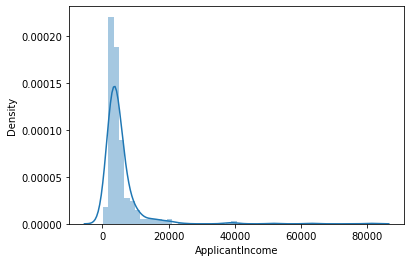

In [18]:
sns.distplot(df.ApplicantIncome)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


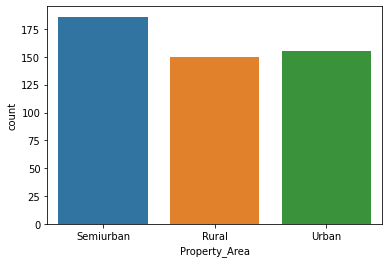

In [19]:
sns.countplot(df.Property_Area)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


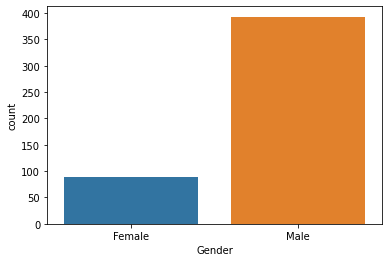

In [20]:
sns.countplot(df.Gender)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


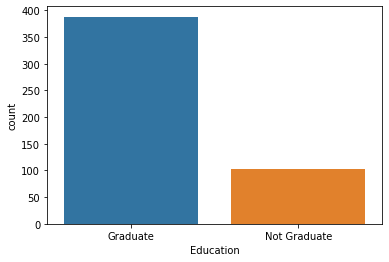

In [21]:
sns.countplot(df.Education)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


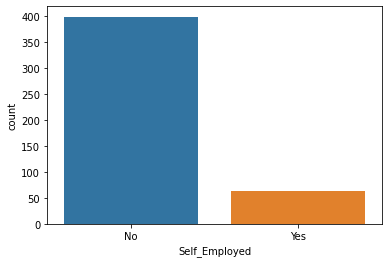

In [22]:
sns.countplot(df.Self_Employed)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


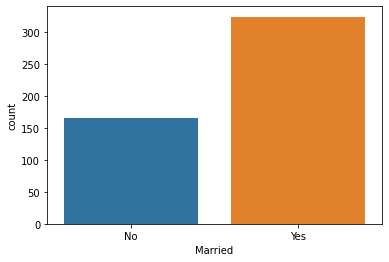

In [23]:
sns.countplot(df.Married)

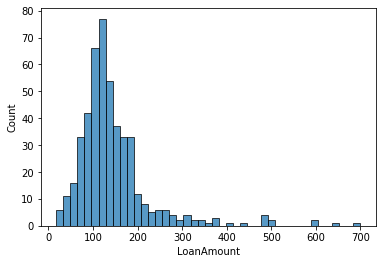

In [24]:
sns.histplot(df.LoanAmount)

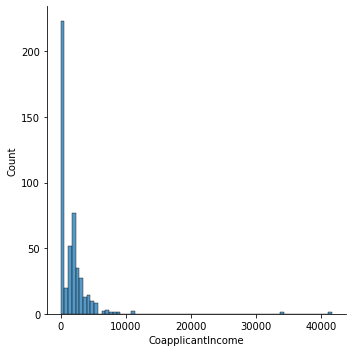

In [25]:
sns.displot(df.CoapplicantIncome)

([<matplotlib.patches.Wedge at 0x7ff656421b50>,
 [Text(0.40872965677112233, 1.0212443721635682, 'Semi urban'),
  Text(-1.0709474773921899, -0.2511404003088809, 'Urban'),
  Text(0.6310943709832784, -0.9009549905035326, 'Rural')])

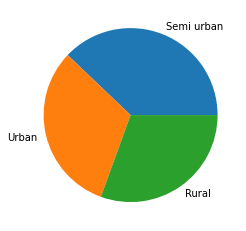

In [26]:
plt.pie(df.Property_Area.value_counts(),[0,0,0],labels=['Semi urban','Urban','Rural'])

In [27]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [28]:
df.Loan_Status.value_counts()

1    343
0    148
Name: Loan_Status, dtype: int64

In [29]:
df.Credit_History.value_counts()

1.0    380
0.0     68
Name: Credit_History, dtype: int64

([<matplotlib.patches.Wedge at 0x7ff656384610>,
 [Text(-0.8696447758690248, 0.6735858993504199, 'Graduate'),
  Text(0.869644744336192, -0.6735859400614294, 'Not Graduate')])

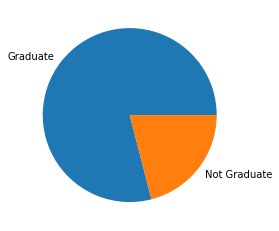

In [30]:
plt.pie(df.Education.value_counts(),[0,0],labels=['Graduate','Not Graduate'])

## Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


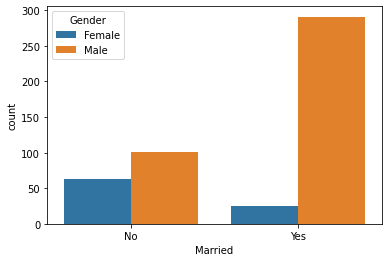

In [31]:
sns.countplot(df['Married'],hue=df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


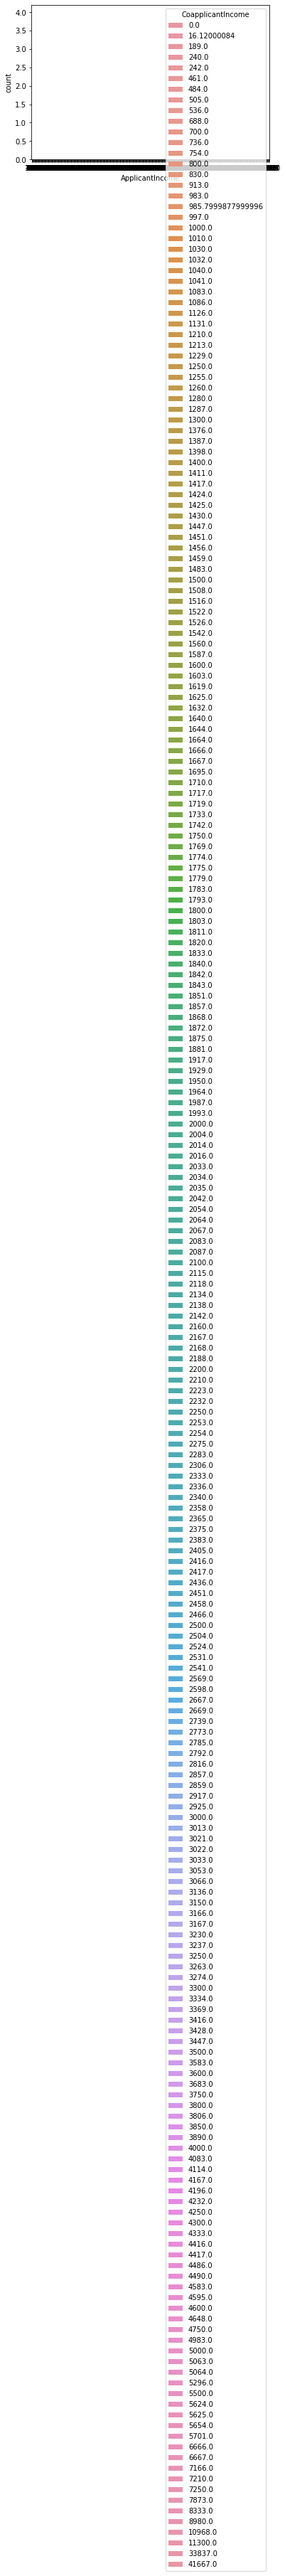

In [32]:
sns.countplot(df['ApplicantIncome'],hue=df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


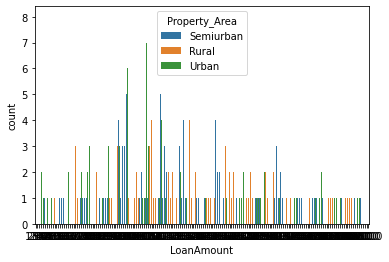

In [33]:
sns.countplot(df['LoanAmount'],hue=df['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


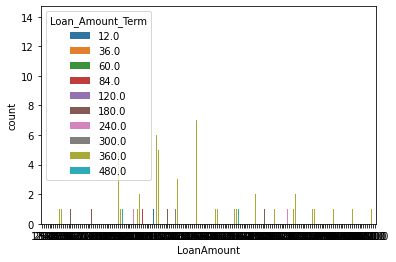

In [34]:
sns.countplot(df['LoanAmount'],hue=df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


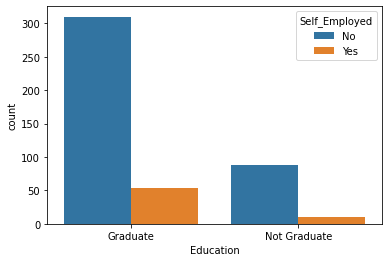

In [35]:
sns.countplot(df['Education'],hue=df['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


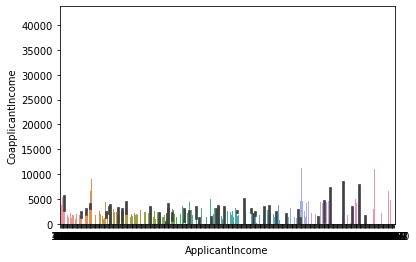

In [36]:
sns.barplot(df.ApplicantIncome,df.CoapplicantIncome)

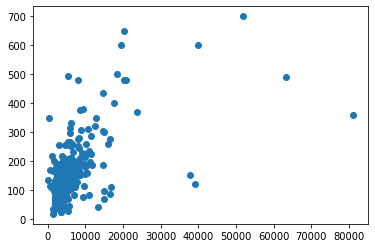

In [37]:
plt.scatter(df.ApplicantIncome,df.LoanAmount)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


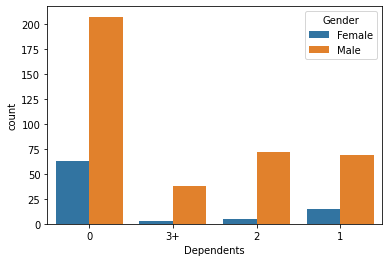

In [38]:
sns.countplot(df['Dependents'],hue=df['Gender'])

## Multivariate Analysis

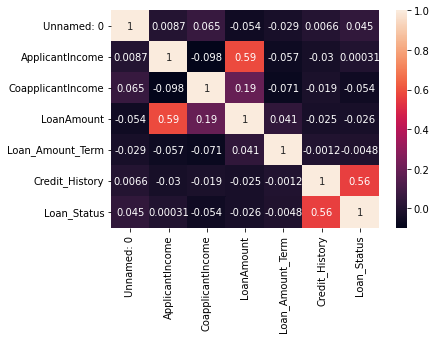

In [39]:
sns.heatmap(df.corr(),annot=True)

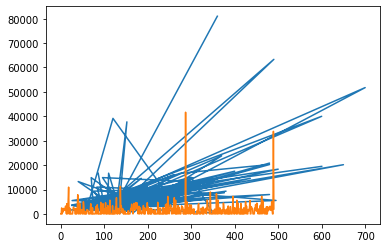

In [40]:
plt.plot(df.LoanAmount,df.ApplicantIncome,df.CoapplicantIncome)

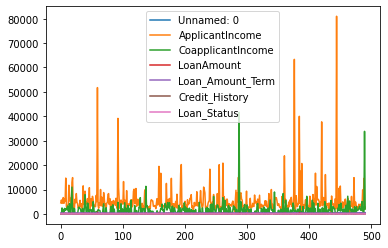

In [41]:
df.plot.line()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff60a01d6d0>,
      dtype=object)

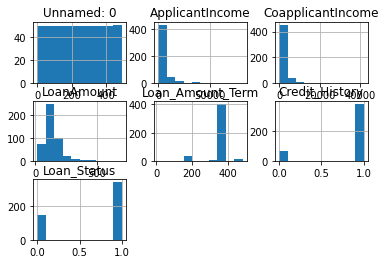

In [42]:
df.hist()

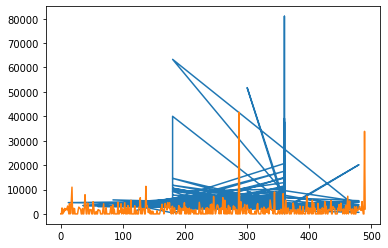

In [43]:
plt.plot(df.Loan_Amount_Term,df.ApplicantIncome,df.CoapplicantIncome)

## Descriptive Analysis

In [44]:
df.describe()

,Unnamed: 0,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,491.000000,491.000000,491.000000,475.000000,478.000000,448.000000,491.000000
mean,245.000000,5401.189409,1589.730998,145.014737,341.297071,0.848214,0.698574
std,141.883755,6419.427177,2919.320624,86.310534,66.964051,0.359214,0.459345
min,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000
25%,122.500000,2923.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,245.000000,3865.000000,1229.000000,126.000000,360.000000,1.000000,1.000000
75%,367.500000,5705.500000,2251.500000,162.000000,360.000000,1.000000,1.000000
max,490.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [45]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0            245.000000
ApplicantIncome      5401.189409
CoapplicantIncome    1589.730998
LoanAmount            145.014737
Loan_Amount_Term      341.297071
Credit_History          0.848214
Loan_Status             0.698574
dtype: float64

In [46]:
df.mode()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,Yes,0,Graduate,No,4583.0,0.0,120.0,360.0,1.0,Semiurban,1.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,486,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0            141.883755
ApplicantIncome      6419.427177
CoapplicantIncome    2919.320624
LoanAmount             86.310534
Loan_Amount_Term       66.964051
Credit_History          0.359214
Loan_Status             0.459345
dtype: float64

In [48]:
df.count()

Unnamed: 0           491
Gender               481
Married              490
Dependents           482
Education            491
Self_Employed        462
ApplicantIncome      491
CoapplicantIncome    491
LoanAmount           475
Loan_Amount_Term     478
Credit_History       448
Property_Area        491
Loan_Status          491
dtype: int64

## Checking For Null Values

In [49]:
df.isnull().any()

Unnamed: 0           False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [50]:
df.isnull().sum()

Unnamed: 0            0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [52]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [53]:
df.isnull().any()

Unnamed: 0           False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [54]:
df.isnull().sum()

Unnamed: 0           0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Handling Categorical Values

In [55]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Female,No,0,Graduate,No,4547,0.0,115.0,360.000000,1.0,Semiurban,1
1,1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.000000,1.0,Rural,1
2,2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.000000,1.0,Urban,0
3,3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,341.297071,1.0,Urban,1
4,4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.000000,1.0,Semiurban,1


In [56]:
le=LabelEncoder()

In [57]:
df.Gender=le.fit_transform(df.Gender)
df.Married=le.fit_transform(df.Married)
df.Education=le.fit_transform(df.Education)
df.Self_Employed=le.fit_transform(df.Self_Employed)
df.Property_Area=le.fit_transform(df.Property_Area)
df.Loan_Status=le.fit_transform(df.Loan_Status)
df.Dependents=le.fit_transform(df.Dependents)

In [58]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,4547,0.0,115.0,360.000000,1.0,1,1
1,1,1,1,3,1,1,5703,0.0,130.0,360.000000,1.0,0,1
2,2,0,1,0,0,0,4333,2451.0,110.0,360.000000,1.0,2,0
3,3,1,1,0,1,1,4695,0.0,96.0,341.297071,1.0,2,1
4,4,1,1,2,0,0,6700,1750.0,230.0,300.000000,1.0,1,1


## Spliting into dependent and independent data

In [59]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,4547,0.0,115.0,360.000000,1.0,1,1
1,1,1,1,3,1,1,5703,0.0,130.0,360.000000,1.0,0,1
2,2,0,1,0,0,0,4333,2451.0,110.0,360.000000,1.0,2,0
3,3,1,1,0,1,1,4695,0.0,96.0,341.297071,1.0,2,1
4,4,1,1,2,0,0,6700,1750.0,230.0,300.000000,1.0,1,1


In [60]:
x=df.iloc[:,:-1]
y=df.Loan_Status

In [61]:
x.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,0,4547,0.0,115.0,360.000000,1.0,1
1,1,1,1,3,1,1,5703,0.0,130.0,360.000000,1.0,0
2,2,0,1,0,0,0,4333,2451.0,110.0,360.000000,1.0,2
3,3,1,1,0,1,1,4695,0.0,96.0,341.297071,1.0,2
4,4,1,1,2,0,0,6700,1750.0,230.0,300.000000,1.0,1


In [62]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Loan_Status, dtype: int64

## Scaling The Data

In [63]:
x_scale=pd.DataFrame(scale(x),columns=x.columns)
x_scale.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-1.728527,-2.139987,-1.399225,-0.742912,-0.515232,-0.387147,-0.133199,-0.545111,-0.353934,0.283367,0.442858,-0.012922
1,-1.721472,0.467293,0.714681,2.214681,1.940874,2.582997,0.047063,-0.545111,-0.177054,0.283367,0.442858,-1.281821
2,-1.714416,-2.139987,0.714681,-0.742912,-0.515232,-0.387147,-0.166569,0.295325,-0.412894,0.283367,0.442858,1.255977
3,-1.707361,0.467293,0.714681,-0.742912,1.940874,2.582997,-0.110120,-0.545111,-0.577982,0.000000,0.442858,1.255977
4,-1.700306,0.467293,0.714681,1.228817,-0.515232,-0.387147,0.202531,0.054955,1.002147,-0.625690,0.442858,-0.012922


## Balancing The Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


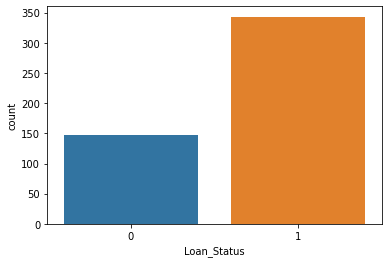

In [64]:
sns.countplot(df.Loan_Status)

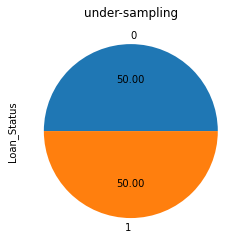

In [65]:
rus=RandomUnderSampler(sampling_strategy=1)
x_res,y_res=rus.fit_resample(x,y)
ax=y_res.value_counts().plot.pie(autopct='%.2f')
_=ax.set_title("under-sampling")

## Splitting Data Into Train And Test


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [67]:
xtrain.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
380,380,0,1,0,1,0,4100,0.0,124.000000,360.0,0.848214,0
149,149,0,1,0,0,0,3166,0.0,36.000000,360.0,1.000000,1
101,101,0,0,1,0,0,13262,0.0,40.000000,360.0,1.000000,2
443,443,1,0,0,1,0,2000,0.0,145.014737,360.0,1.000000,2
288,288,1,0,0,1,0,3620,0.0,25.000000,120.0,1.000000,1


In [68]:
xtest.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
88,88,1,1,0,0,1,3459,0.0,25.0,120.0,1.0,1
466,466,1,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0
129,129,1,0,0,0,0,3167,0.0,74.0,360.0,1.0,2
431,431,1,0,1,0,0,4384,1793.0,117.0,360.0,1.0,2
315,315,1,1,3,0,0,4281,0.0,100.0,360.0,1.0,2


In [69]:
ytrain.head()

380    1
149    1
101    1
443    0
288    1
Name: Loan_Status, dtype: int64

In [70]:
ytest.head()

88     1
466    1
129    0
431    1
315    1
Name: Loan_Status, dtype: int64

In [71]:
xtrain.shape

(343, 12)

In [72]:
xtest.shape

(148, 12)

In [73]:
ytrain.shape

(343,)

In [74]:
ytest.shape

(148,)

## Model Building

## Decision Tree Model

In [75]:
from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier(random_state=100)

In [76]:
dmodel.fit(x_res,y_res)

DecisionTreeClassifier(random_state=100)

In [77]:
ypredd=dmodel.predict(xtest)

In [78]:
ypred2d=dmodel.predict(xtrain)

In [79]:
print("Decision Tree Model Testing Accuracy")
print(accuracy_score(ytest,ypredd))
print("Decision Tree Model Training Accuracy")
print(accuracy_score(ytrain,ypred2d))

Decision Tree Model Testing Accuracy
0.8513513513513513
Decision Tree Model Training Accuracy
0.8658892128279884
